<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/CarsReliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

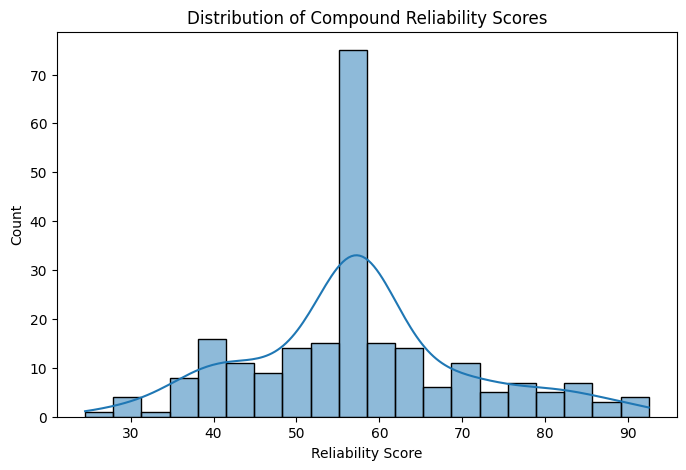

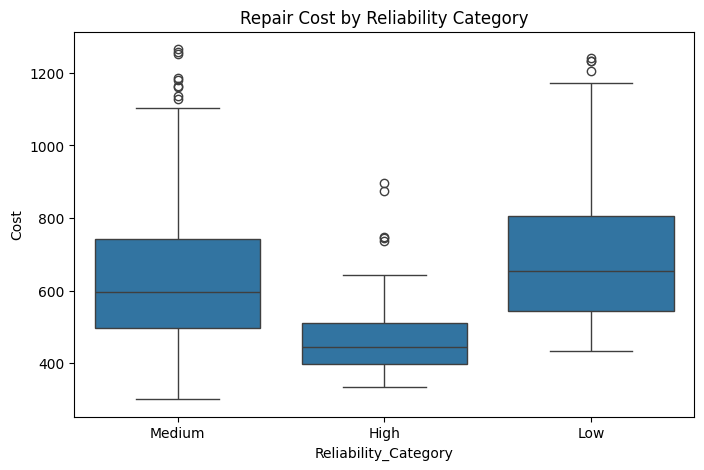

Model Accuracy: 0.574468085106383
              precision    recall  f1-score   support

        High       0.33      0.33      0.33         3
         Low       0.25      0.15      0.19        13
      Medium       0.67      0.77      0.72        31

    accuracy                           0.57        47
   macro avg       0.42      0.42      0.41        47
weighted avg       0.53      0.57      0.55        47



In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Rename the file to fix the trailing space issue
os.rename("/content/reliability_test.csv ", "/content/reliability_test.csv")

# Load the dataset with the corrected file name
file_path = "/content/reliability_test.csv"
df = pd.read_csv(file_path)

# Data Preprocessing
imputer = SimpleImputer(strategy='mean')
df['Compound_Reliability_Score'] = imputer.fit_transform(df[['Compound_Reliability_Score']])

def categorize_reliability(score):
    if score >= 75:
        return 'High'
    elif score >= 50:
        return 'Medium'
    else:
        return 'Low'

df['Reliability_Category'] = df['Compound_Reliability_Score'].apply(categorize_reliability)

plt.figure(figsize=(8, 5))
sns.histplot(df['Compound_Reliability_Score'], bins=20, kde=True)
plt.title("Distribution of Compound Reliability Scores")
plt.xlabel("Reliability Score")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Reliability_Category'], y=df['Cost'])
plt.title("Repair Cost by Reliability Category")
plt.show()

features = ['Cost', 'F1', 'Frequency', 'Overall Score', 'Severity', 'Unscheduled 3 Year Repairs']
X = df[features]
y = df['Reliability_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
